In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("sample_network.csv")
graph = nx.from_pandas_edgelist(data, source="Source", target="Sink", edge_attr=True, create_using=nx.DiGraph)

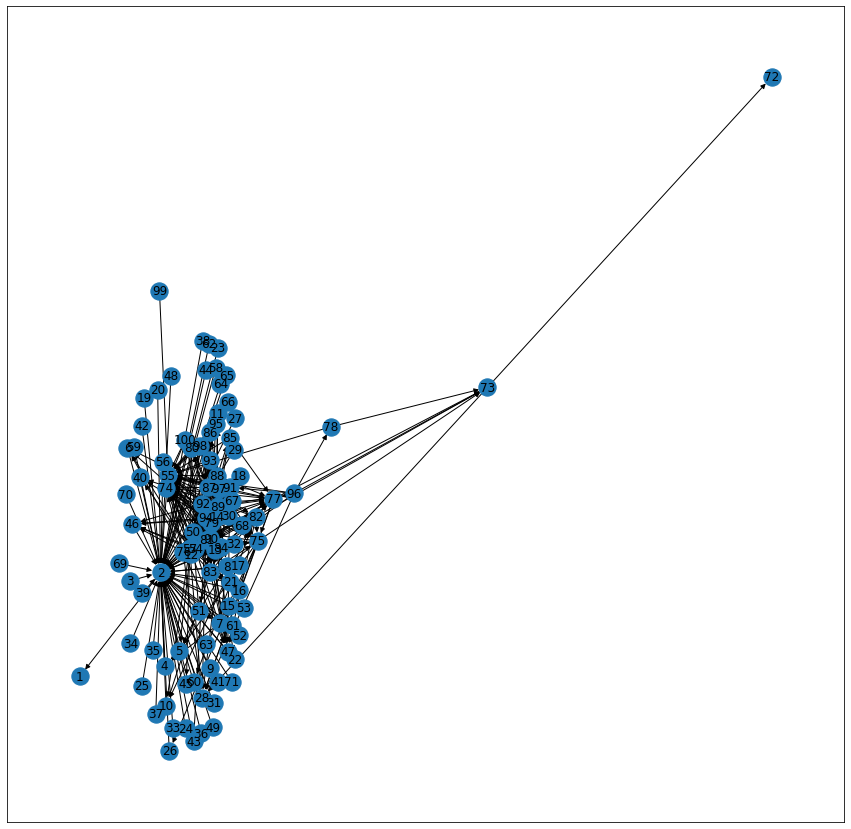

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
nx.draw_networkx(graph, ax=ax)

In [4]:
def degree_connectivity(graph, node):
    """
    Compute connectivity degree of a graph

    Args:
        graph: NetworkX graph
            -
        node: any type
            -
    Returns:
        inflow_centrality, outflow_centrality: int
    """

    if not isinstance(graph, nx.Graph):
        raise AssertionError("graph must be NetworkX graph")

    return len(nx.edges(graph, node)), len([e for e in nx.edges(graph) if e[1] == node])

In [5]:
def closeness_centrality(graph, node, weight="Hours"):
    """
    Compute closeness centrality of a graph

    Args:
        graph: NetworkX graph
            -
        node: any type
            -
        weight: any type
            name of weight column
    Returns:
        closeness_centrality: float
    """

    if not isinstance(graph, nx.Graph):
        raise AssertionError("graph must be NetworkX graph")

    result = 0
    
    paths = nx.shortest_path(graph, source=node)

    for node2 in nx.nodes(graph):
        if node2 in paths:
            if node != node2:
                result += sum([graph.edges[paths[node2][i], paths[node2][i + 1]][weight] for i in range(len(paths[node2]) - 1)])
            
    return result / (len(nx.nodes(graph)) - 1)

In [6]:
def betweenness_centrality(graph, node):
    """
    Compute betweenness centrality of a graph

    Args:
        graph: NetworkX graph
            -
        node: any type
            -
    Returns:
        betweenness_centrality: float
    """

    if not isinstance(graph, nx.Graph):
        raise AssertionError("graph must be NetworkX graph")

    result = 0
    
    paths = nx.shortest_path(graph)

    for node1 in nx.nodes(graph):
        if node1 == node: continue
        for node2 in nx.nodes(graph):
            if node2 == node or node2 == node1: continue
            if node1 in paths and node2 in paths[node1] and node in paths[node1][node2]:
                result += 1
 
    return result

In [7]:
def network_density(graph):
    """
    Compute network density of a graph

    Args:
        graph: NetworkX graph
            -
    Returns:
        network_density: float
    """

    if not isinstance(graph, nx.Graph):
        raise AssertionError("graph must be NetworkX graph")

    if graph.is_directed():
        return len(graph.edges) / (len(graph.nodes) * (len(graph.nodes) - 1))
    else:
        return 2 * len(graph.edges) / (len(graph.nodes) * (len(graph.nodes) - 1))

In [8]:
def network_diameter(graph, weight="Hours"):
    """
    Compute network diameter of a graph

    Args:
        graph: NetworkX graph
            -
        weight: any type
            name of weigth column
    Returns:
        network_diameter: float
    """

    if not isinstance(graph, nx.Graph):
        raise AssertionError("graph must be NetworkX graph")

    paths = nx.shortest_path(graph)
    
    max_dist = -np.inf
    
    for node1 in graph.nodes:
        for node2 in graph.nodes:
            if node1 in paths and node2 in paths[node1]:
                cur_dist = sum([graph.edges[paths[node1][node2][i], paths[node1][node2][i + 1]][weight] for i in range(len(paths[node1][node2]) - 1)])
                if cur_dist > max_dist:
                    max_dist = cur_dist

    return max_dist

In [9]:
def network_average_path_length(graph, weight="Hours"):
    """
    Compute network average path length of a graph

    Args:
        graph: NetworkX graph
            -
        weigth: any type
            name of weight column
    Returns:
        network_average_path_length: float
    """

    if not isinstance(graph, nx.Graph):
        raise AssertionError("graph must be NetworkX graph")

    paths = nx.shortest_path(graph)
    
    result = 0
    
    for node1 in graph.nodes:
        for node2 in graph.nodes:
            if node1 in paths and node2 in paths[node1]:
                result += sum([graph.edges[paths[node1][node2][i], paths[node1][node2][i + 1]][weight] for i in range(len(paths[node1][node2]) - 1)])
            
    return result / (len(graph.nodes) * (len(graph.nodes) - 1))

In [10]:
deg_con = dict()
for node in graph.nodes:
    deg_con[node] = degree_connectivity(graph, node)
deg_con

{2: (1, 69),
 1: (0, 1),
 3: (1, 0),
 4: (1, 2),
 5: (2, 3),
 6: (1, 4),
 7: (2, 3),
 8: (2, 4),
 9: (1, 0),
 10: (1, 3),
 11: (1, 3),
 12: (2, 3),
 13: (3, 2),
 14: (4, 4),
 15: (1, 0),
 16: (1, 1),
 17: (1, 2),
 18: (1, 0),
 19: (1, 0),
 20: (1, 0),
 21: (1, 0),
 22: (1, 1),
 23: (1, 0),
 24: (1, 0),
 25: (1, 0),
 26: (1, 1),
 27: (1, 0),
 28: (1, 8),
 29: (1, 0),
 30: (1, 0),
 31: (1, 0),
 32: (1, 0),
 33: (1, 0),
 34: (1, 0),
 35: (1, 0),
 36: (1, 0),
 37: (1, 0),
 38: (1, 0),
 39: (1, 0),
 40: (1, 3),
 41: (1, 0),
 42: (1, 0),
 43: (1, 1),
 44: (1, 0),
 45: (1, 1),
 46: (1, 6),
 47: (1, 10),
 48: (1, 0),
 49: (1, 0),
 50: (3, 3),
 51: (5, 1),
 52: (1, 0),
 53: (1, 0),
 54: (3, 16),
 55: (2, 29),
 56: (3, 1),
 57: (14, 21),
 58: (1, 0),
 59: (1, 0),
 60: (1, 1),
 61: (1, 0),
 62: (1, 0),
 63: (1, 0),
 64: (1, 0),
 65: (1, 0),
 66: (1, 0),
 67: (1, 0),
 68: (1, 0),
 69: (1, 0),
 70: (1, 0),
 71: (1, 0),
 75: (14, 10),
 76: (9, 9),
 87: (14, 5),
 94: (21, 0),
 89: (12, 7),
 82: (11, 

In [11]:
close_cen = dict()
for node in graph.nodes:
    close_cen[node] = closeness_centrality(graph, node, "Kbps_AVG")
close_cen

{2: 755.070707070707,
 1: 0.0,
 3: 2368.6464646464647,
 4: 2823.757575757576,
 5: 1789.4141414141413,
 6: 1272.2424242424242,
 7: 1323.959595959596,
 8: 3371.959595959596,
 9: 1706.6666666666667,
 10: 775.7575757575758,
 11: 2699.6363636363635,
 12: 2027.3131313131314,
 13: 2244.5252525252527,
 14: 2410.020202020202,
 15: 982.6262626262626,
 16: 2761.6969696969695,
 17: 1479.111111111111,
 18: 1106.7474747474748,
 19: 1892.8484848484848,
 20: 2554.8282828282827,
 21: 837.8181818181819,
 22: 1727.3535353535353,
 23: 1024.0,
 24: 2658.2626262626263,
 25: 2596.2020202020203,
 26: 1417.050505050505,
 27: 1830.7878787878788,
 28: 2120.40404040404,
 29: 1623.919191919192,
 30: 2741.010101010101,
 31: 961.939393939394,
 32: 1499.79797979798,
 33: 1727.3535353535353,
 34: 2285.89898989899,
 35: 1334.3030303030303,
 36: 1437.7373737373737,
 37: 1892.8484848484848,
 38: 1003.3131313131313,
 39: 2058.343434343434,
 40: 1189.4949494949494,
 41: 2079.030303030303,
 42: 2265.212121212121,
 43: 1003.

In [12]:
bet_cen = dict()
for node in graph.nodes:
    bet_cen[node] = betweenness_centrality(graph, node)
bet_cen

{2: 97,
 1: 0,
 3: 0,
 4: 0,
 5: 27,
 6: 6,
 7: 2,
 8: 5,
 9: 0,
 10: 4,
 11: 0,
 12: 1,
 13: 0,
 14: 55,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 8,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 2,
 47: 6,
 48: 0,
 49: 0,
 50: 1,
 51: 0,
 52: 0,
 53: 0,
 54: 35,
 55: 40,
 56: 0,
 57: 253,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 75: 171,
 76: 33,
 87: 15,
 94: 0,
 89: 24,
 82: 15,
 83: 46,
 79: 54,
 73: 26,
 77: 69,
 84: 64,
 96: 0,
 92: 0,
 81: 13,
 90: 0,
 91: 1,
 80: 4,
 86: 3,
 88: 0,
 74: 6,
 78: 0,
 85: 0,
 93: 3,
 95: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 72: 0}

In [13]:
network_density(graph)

0.03272727272727273

In [14]:
network_diameter(graph, "Kbps_AVG")

374784

In [15]:
network_average_path_length(graph, "Kbps_AVG")

12155.397171717172

In [141]:
def bfs(graph, source, target, weight):
    q = [source]
    nx.set_node_attributes(graph, -1, "from")
    nx.set_node_attributes(graph, False, "visited")
    cur = source
    while q:
        while q and graph.nodes[cur]["visited"]:
            cur = q[0]
            q.remove(q[0])
        graph.nodes[cur]["visited"] = True
        if target in graph[cur] and graph.edges[cur, target][weight] > 0:
            graph.nodes[target]["from"] = cur
            break
        for n in graph[cur]:
            if graph.nodes[cur]["from"] != n and not graph.nodes[n]["visited"] and graph.edges[cur, n][weight] > 0:
                graph.nodes[n]["from"] = cur
                q.append(n)
        
            
    path = []
    if graph.nodes[target]["from"] != -1:
        while target != -1:
            path.append(target)
            target = graph.nodes[target]["from"]
    return path[::-1]

In [142]:
def edmonds_karp(graph_, source, target, cap="Kbps_AVG"):
    def bottle_neck(path, cap="rem_cap"):
        bn = float('inf')
        for i in range(len(path) - 1):
            bn = min(bn, graph.edges[path[i], path[i + 1]][cap])
        return bn
    
    def add_residual(cap=cap):
        graph = graph_.copy()
        for edge in graph.edges:
            graph.add_edge(*edge)
            graph.add_edge(edge[1], edge[0])
            graph.edges[[edge[1], edge[0]]]['Source'] = edge[1]
            graph.edges[[edge[1], edge[0]]]['Sink']   = edge[0]
            graph.edges[[edge[1], edge[0]]][cap]      = 0
        return graph
        
    graph = add_residual()
    
    res = 0
    
    nx.set_edge_attributes(graph, 0, "flow")
    nx.set_edge_attributes(graph, 0, "rem_cap")
    
    
    for edge in graph.edges:
        graph.edges[edge]['rem_cap'] = graph.edges[edge][cap] - graph.edges[edge]['flow']
    path = bfs(graph, source, target, "rem_cap")
    while path:
        bn = bottle_neck(path)
        res += bn
        for i in range(len(path) - 1):
            graph.edges[path[i], path[i + 1]]['flow'] += bn
        
        for edge in graph.edges:
            graph.edges[edge]['rem_cap'] = graph.edges[edge][cap] - graph.edges[edge]['flow']
        path = bfs(graph, source, target, "rem_cap")
    return res

In [143]:
print(edmonds_karp(graph, 97, 2))

194560
